In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
data=pd.read_csv('gold1.csv')


In [ ]:
data.head()

,Date,Price
0,01-01-2014,29542
1,02-01-2014,29975
2,03-01-2014,29727
3,04-01-2014,29279
4,06-01-2014,29119


In [ ]:
data.tail()

,Date,Price
2067,23-12-2021,48012
2068,24-12-2021,47982
2069,27-12-2021,47933
2070,28-12-2021,47888
2071,29-12-2021,47515


In [ ]:
data.shape

(2072, 2)

In [ ]:
data['Date']=pd.to_datetime(data['Date'])
data.rename(columns={'Date':'date','Price':'price'},inplace=True)

In [ ]:
data=data.set_index(['date'])

In [ ]:
data_train=data.iloc[:1500,:]
data_test=data.iloc[1500:,:]

In [ ]:
data_train.shape

(1500, 1)

In [ ]:
data_test.shape

(572, 1)

In [ ]:
def create_features(data, label=None):
    data['date'] = data.index
    data['hour'] = data['date'].dt.hour
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['dayofyear'] = data['date'].dt.dayofyear
    data['dayofmonth'] = data['date'].dt.day
    data['weekofyear'] = data['date'].dt.weekofyear
    
    X = data[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = data[label]
        return X, y
    return X


In [ ]:
X_train, y_train = create_features(data_train, label='price')
X_test, y_test = create_features(data_test, label='price')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
X_train.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,
2014-01-01,0,2,1,1,2014,1,1,1
2014-02-01,0,5,1,2,2014,32,1,5
2014-03-01,0,5,1,3,2014,60,1,9
2014-04-01,0,1,2,4,2014,91,1,14
2014-06-01,0,6,2,6,2014,152,1,22


In [ ]:
y_train.head()

date
2014-01-01    29542
2014-02-01    29975
2014-03-01    29727
2014-04-01    29279
2014-06-01    29119
Name: price, dtype: int64

In [ ]:
model=xgb.XGBRegressor(n_estimators=1000)

In [ ]:
model.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],early_stopping_rounds=10,verbose=False)

[18:08:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
model.feature_importances_

array([0.        , 0.00854976, 0.01322611, 0.01632652, 0.6366725 ,
       0.09857202, 0.19424383, 0.03240924], dtype=float32)

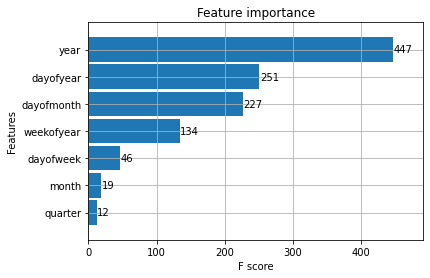

In [ ]:
feature_imp_plot=plot_importance(model,height=0.9)

In [ ]:


data_test['predict_price'] = model.predict(X_test)
new_data = pd.concat([data_test, data_train], sort=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


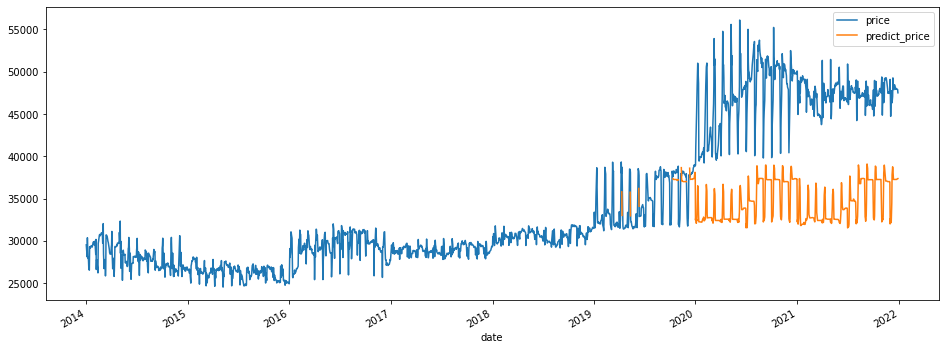

In [ ]:
predict_vs_actual=new_data[['price','predict_price']].plot(figsize=(16, 6))